# PyCaret 2 Regression Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version

version()

# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data

data = get_data("insurance")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initialize Setup

### 気になったsetup()の引数メモ

#### 追加で入れといた方が良さそうなの
- log_data=True なら訓練データとテストデータがcsvとして保存されるらしいがされず・・・。MLFlowでの話？
- session_id=123 乱数固定


#### データの切り方
- data_split_shuffl=False, folds_shuffle=False にしたらまだ時系列に近い切り方でtrain/validation/test切れる
    - デフォルトはどちらもTrue


#### MLFlow
- log_experiment=True ならすべてのメトリクスとパラメータが MLFlow サーバに記録
    - デフォルトはFalse


- log_plots=True なら特定のプロットを png ファイルとして MLflow に記録
	- デフォルトは False
    

- log_profile=True ならデータプロファイルも html ファイルとして MLflow に記録
    - デフォルトは False
  


In [3]:
from pycaret.regression import *
help(setup)

Help on function setup in module pycaret.regression:

setup(data, target, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation='constant', ordinal_features=None, high_cardinality_features=None, high_cardinality_method='frequency', numeric_features=None, numeric_imputation='mean', date_features=None, ignore_features=None, normalize=False, normalize_method='zscore', transformation=False, transformation_method='yeo-johnson', handle_unknown_categorical=True, unknown_categorical_method='least_frequent', pca=False, pca_method='linear', pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove_outliers=False, outliers_threshold=0.05, remove_multicollinearity=False, multicollinearity_threshold=0.9, remove_perfect_collinearity=False, create_clusters=False, cluster_iter=20, polynomial_features=False, polynomial_degree=2, trigonometry_features=False, polynomial_threshold

In [4]:
from pycaret.regression import *

reg1 = setup(
    data,
    target="charges",
    session_id=123,
    log_experiment=True,
    experiment_name="insurance1",
    log_data=True,
    silent=True,
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


2020/08/01 16:22:01 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [5]:
reg1

(       age     bmi  sex_female  sex_male  children_0  children_1  children_2  \
 0     19.0  27.900         1.0       0.0         1.0         0.0         0.0   
 1     18.0  33.770         0.0       1.0         0.0         1.0         0.0   
 2     28.0  33.000         0.0       1.0         0.0         0.0         0.0   
 3     33.0  22.705         0.0       1.0         1.0         0.0         0.0   
 4     32.0  28.880         0.0       1.0         1.0         0.0         0.0   
 ...    ...     ...         ...       ...         ...         ...         ...   
 1333  50.0  30.970         0.0       1.0         0.0         0.0         0.0   
 1334  18.0  31.920         1.0       0.0         1.0         0.0         0.0   
 1335  18.0  36.850         1.0       0.0         1.0         0.0         0.0   
 1336  21.0  25.800         1.0       0.0         1.0         0.0         0.0   
 1337  61.0  29.070         1.0       0.0         1.0         0.0         0.0   
 
       children_3  childre

# 3. Compare Baseline

In [6]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,2671.5927,23019681.2661,4794.6037,0.8393,0.4439,0.3143,0.0584
1,CatBoost Regressor,2852.1323,25408736.9696,5038.5479,0.8223,0.4896,0.3573,0.6854
2,Random Forest,2779.2026,25351757.1506,5032.2587,0.8218,0.4816,0.3432,0.1889
3,Light Gradient Boosting Machine,3018.9895,25515012.3051,5049.8492,0.8192,0.5534,0.3876,0.0610
4,Extra Trees Regressor,2755.9265,28180447.2658,5299.6566,0.8043,0.4875,0.3255,0.1581
5,AdaBoost Regressor,4366.1001,29298215.0087,5411.0606,0.7915,0.6478,0.7662,0.0141
6,Extreme Gradient Boosting,3257.2767,31489403.0961,5610.5079,0.7774,0.5723,0.4072,0.0618
7,Bayesian Ridge,4343.5006,38542310.2536,6196.4607,0.7343,0.6405,0.4436,0.0027
8,Linear Regression,4332.7658,38549952.0026,6197.0842,0.7343,0.6369,0.4415,0.0020
9,Lasso Regression,4332.6327,38543897.4692,6196.6074,0.7343,0.6404,0.4416,0.0022


# 4. Create Model

In [7]:
lightgbm = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2972.9329,24058897.4348,4904.9870,0.8563,0.6083,0.3985
1,3080.5340,29299758.4480,5412.9251,0.8296,0.4459,0.3268
2,3022.2314,27624562.6635,5255.9074,0.6502,0.6822,0.4361
3,3146.2422,25018958.4876,5001.8955,0.7911,0.6398,0.5095
4,3154.6899,28894513.0880,5375.3617,0.7851,0.5901,0.3617
5,2931.0896,21432486.1979,4629.5233,0.8621,0.4131,0.2829
6,2625.9358,20785814.4415,4559.1462,0.8586,0.3891,0.3070
7,2678.3617,24232738.5540,4922.6760,0.8668,0.5098,0.2720
8,2710.3380,21418665.4818,4628.0304,0.8617,0.5574,0.4101
9,3273.2286,29598375.8594,5440.4389,0.8094,0.5916,0.3804


In [8]:
import numpy as np

lgbms = [create_model("lightgbm", learning_rate=i) for i in np.arange(0.1, 1, 0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4202.0830,37315426.0049,6108.6354,0.7771,0.6969,0.5901
1,4164.7622,38772693.8976,6226.7723,0.7746,0.6826,0.4917
2,4545.7489,45041923.5654,6711.3280,0.4297,0.9558,0.6772
3,4390.3370,41942311.1362,6476.2884,0.6498,0.7140,0.7225
4,4617.2417,41981223.1575,6479.2919,0.6878,0.6963,0.5784
5,4166.0225,34525507.1405,5875.8410,0.7779,0.6199,0.4641
6,3916.8456,31704830.1337,5630.7042,0.7843,0.7189,0.4801
7,3689.6088,32718649.0173,5720.0218,0.8201,0.6266,0.4303
8,3995.6685,35808315.2188,5984.0049,0.7687,0.9064,0.6267
9,4616.1772,47556279.2763,6896.1061,0.6937,0.8657,0.7124


In [9]:
print(len(lgbms))

9


# 5. Tune Hyperparameters

In [10]:
help(tune_model)

Help on function tune_model in module pycaret.regression:

tune_model(estimator, fold=10, round=4, n_iter=10, custom_grid=None, optimize='R2', choose_better=False, verbose=True)
    Description:
    ------------
    This function tunes the hyperparameters of a model and scores it using Kfold 
    Cross Validation. The output prints the score grid that shows MAE, MSE, RMSE, 
    R2, RMSLE and MAPE by fold (by default = 10 Folds).
    
    This function returns a trained model object.  
    
    tune_model() only accepts a string parameter for estimator.
    
        Example
        -------
        from pycaret.datasets import get_data
        boston = get_data('boston')
        experiment_name = setup(data = boston,  target = 'medv')
        xgboost = create_model('xgboost')
    
        tuned_xgboost = tune_model(xgboost) 
    
        This will tune the hyperparameters of Extreme Gradient Boosting Regressor.
    
    Parameters
    ----------
    estimator : object, default = None
   

In [11]:
tuned_lightgbm = tune_model(lightgbm, 
                            n_iter=50, 
                            optimize="RMSE",
                            #optimize="MAE",
                           )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2593.5203,18901959.3512,4347.6384,0.8871,0.4122,0.3237
1,3035.8826,30123714.3097,5488.5075,0.8249,0.4577,0.3318
2,2783.8710,21407816.7463,4626.8582,0.7290,0.4923,0.4139
3,2870.6945,21243674.2878,4609.0861,0.8226,0.4748,0.4161
4,2838.7473,24370286.3864,4936.6270,0.8187,0.4455,0.3016
5,2632.6379,18784222.6047,4334.0769,0.8792,0.3588,0.2780
6,2523.0774,19451327.4176,4410.3659,0.8676,0.3888,0.3309
7,2700.1459,24627482.8087,4962.6085,0.8646,0.4674,0.3220
8,2627.2142,19952600.0244,4466.8333,0.8711,0.4601,0.3909
9,2945.2125,25414198.6301,5041.2497,0.8363,0.4971,0.3744


In [12]:
tuned_lightgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=10, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.4, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 6. Ensemble Model

In [13]:
dt = create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3130.7528,39833455.1804,6311.3751,0.7621,0.5067,0.3295
1,3104.8369,45066079.6663,6713.1274,0.7380,0.5410,0.3104
2,3315.3420,47502769.5127,6892.2253,0.3986,0.6452,0.4540
3,2869.0078,40057346.7729,6329.0874,0.6655,0.6043,0.5635
4,4039.3881,64499878.1756,8031.1816,0.5203,0.6590,0.5106
5,3324.7419,41203145.5554,6418.9676,0.7350,0.4916,0.3224
6,2579.6933,38790767.7084,6228.2235,0.7361,0.3911,0.2259
7,2727.9530,35755628.9950,5979.6011,0.8034,0.4698,0.1807
8,2863.0106,38662493.2325,6217.9171,0.7503,0.5113,0.4390
9,3207.8434,47265363.5462,6874.9810,0.6956,0.5121,0.2716


In [14]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2689.4264,22734130.6123,4768.0322,0.8642,0.4756,0.3477
1,2850.5489,30834672.8607,5552.8977,0.8207,0.4683,0.2826
2,2767.0499,24433673.6238,4943.0430,0.6906,0.5459,0.3887
3,2842.4438,24548531.6439,4954.6475,0.7950,0.5165,0.4156
4,3020.6002,30696946.6676,5540.4825,0.7717,0.5602,0.3738
5,2818.9442,22660137.1436,4760.2665,0.8542,0.3712,0.2631
6,2617.3220,22836756.3973,4778.7819,0.8446,0.3874,0.3035
7,2684.8101,24880599.5740,4988.0457,0.8632,0.4451,0.2565
8,2334.3161,18535034.5531,4305.2334,0.8803,0.4357,0.3510
9,2820.2249,29299167.6551,5412.8706,0.8113,0.5072,0.3478


In [15]:
boosted_dt = ensemble_model(dt, method="Boosting")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2088.6098,25306132.7724,5030.5201,0.8489,0.4360,0.2089
1,2694.4500,37713226.9165,6141.1096,0.7807,0.5023,0.2522
2,2580.2904,31829320.0726,5641.7480,0.5970,0.5954,0.3725
3,2026.3867,22848511.3127,4780.0116,0.8092,0.3817,0.1531
4,2633.2594,33473772.0139,5785.6523,0.7510,0.5501,0.2779
5,3304.0820,42910088.5364,6550.5793,0.7240,0.4398,0.2454
6,1691.5091,21151389.5978,4599.0640,0.8561,0.3226,0.1226
7,1901.6365,22951628.1452,4790.7858,0.8738,0.3633,0.1116
8,1842.4044,20941293.3847,4576.1658,0.8647,0.3641,0.2280
9,2618.3033,36220824.9672,6018.3739,0.7667,0.4830,0.2274


# 7. Blend Models

In [16]:
blender = blend_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3580.7118,27147560.4138,5210.3321,0.8379,0.4459,0.3898
1,3890.3187,37372139.4187,6113.2757,0.7827,0.4687,0.3526
2,3268.9632,23732174.1683,4871.5679,0.6995,0.5130,0.4489
3,3245.1003,21432508.0740,4629.5257,0.8210,0.4894,0.4799
4,3830.8312,34061208.1679,5836.1981,0.7467,0.4980,0.3890
5,3401.3395,27925560.3011,5284.4641,0.8204,0.3718,0.3011
6,3337.3554,29574508.5330,5438.2450,0.7988,0.4217,0.3679
7,3917.3541,32809893.6628,5727.9921,0.8196,0.4432,0.3371
8,3582.2603,28086746.7281,5299.6931,0.8186,0.4761,0.4444
9,3800.1141,32754143.3526,5723.1236,0.7890,0.5125,0.3934


# 8. Stack Models

In [17]:
stacker = stack_models(
    estimator_list=compare_models(
        n_select=5, 
        fold=5, 
        whitelist=models(type="ensemble").index.tolist()
    )
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2642.7922,20856949.9262,4566.9410,0.8754,0.4407,0.3212
1,2902.3820,31751837.8462,5634.8769,0.8154,0.4914,0.2799
2,2587.0873,22782980.1055,4773.1520,0.7115,0.5100,0.3055
3,2787.4204,21391610.0745,4625.1065,0.8214,0.4573,0.3598
4,2929.6668,28137393.6407,5304.4692,0.7907,0.5409,0.3330
5,2675.1195,19957004.8592,4467.3264,0.8716,0.4433,0.2665
6,2480.1564,20325090.0240,4508.3356,0.8617,0.3511,0.2724
7,2690.3026,24371207.5573,4936.7203,0.8660,0.4179,0.2386
8,2318.5603,17289678.5128,4158.0859,0.8883,0.3954,0.3158
9,3039.7244,27921182.4405,5284.0498,0.8202,0.5378,0.3654


# 9. Analyze Model

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


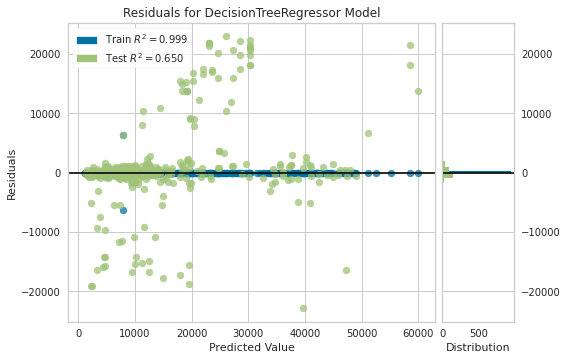

In [18]:
plot_model(dt)

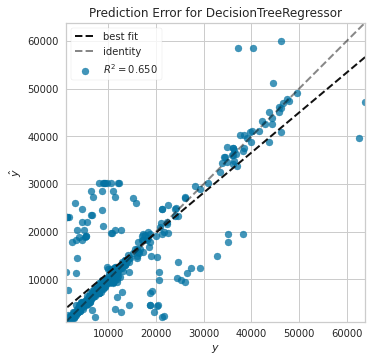

In [19]:
plot_model(dt, plot="error")

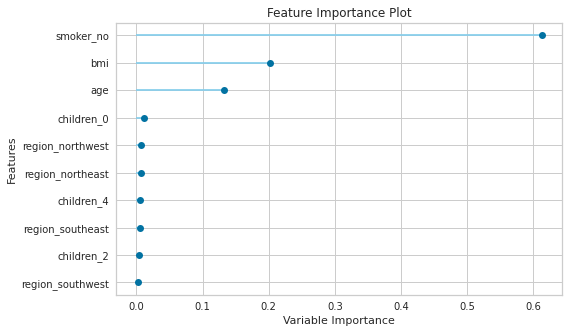

In [20]:
plot_model(dt, plot="feature")

In [21]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model
## DockerではShapはつかえない。imageが壊れるためインストールしていない

In [22]:
#interpret_model(lightgbm)

In [23]:
#interpret_model(lightgbm, plot="correlation")

In [24]:
#interpret_model(lightgbm, plot="reason", observation=12)

# 11. AutoML()

In [25]:
help(automl)

Help on function automl in module pycaret.regression:

automl(optimize='R2', use_holdout=False)
    Description:
    ------------
    This function returns the best model out of all models created in 
    current active environment based on metric defined in optimize parameter. 
    
    Parameters
    ----------
    optimize : string, default = 'R2'
    Other values you can pass in optimize param are 'MAE', 'MSE', 'RMSE',
    'RMSLE', and 'MAPE'. 
    
    use_holdout: bool, default = False
    When set to True, metrics are evaluated on holdout set instead of CV.



In [26]:
best = automl(optimize="MAE")
best

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=123,
                                                       splitter='best'),
                

# 12. Predict Model

In [27]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2764.0353,2.068683e+07,4548.2773,0.8552,0.5223,0.3678


,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9800.88820,9363.9665
1,32.0,37.335,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4667.60765,10393.4936
2,27.0,31.400,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34838.87300,35628.9933
3,35.0,24.130,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5125.21570,6926.8267
4,60.0,25.740,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12142.57860,17508.2783


In [28]:
new_data = data.copy()
new_data.drop(["charges"], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,16884.9240
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,5138.2567
3,33,male,22.705,0,no,northwest,21984.4706
4,32,male,28.880,0,no,northwest,3866.8552


# 13. Save / Load Model

In [29]:
save_model(best, model_name="best-model")

Transformation Pipeline and Model Succesfully Saved


In [30]:
from pycaret.regression import *  # v2.0からsetup()実行しなくてもモデルロードできる

loaded_bestmodel = load_model("best-model")
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Level...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [31]:
from sklearn import set_config

set_config(display="diagram")
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Level...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='charges')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [32]:
from sklearn import set_config

set_config(display="text")

# 14. Deploy Model

In [33]:
#deploy_model(best, model_name="best-aws", authentication={"bucket": "pycaret-test"})

# 15. Get Config / Set Config

In [34]:
X_train = get_config("X_train")
X_train.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.55,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
904,60.0,35.10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
670,30.0,31.57,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
617,49.0,25.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
373,26.0,32.90,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
get_config("seed")

123

In [36]:
from pycaret.regression import set_config

set_config("seed", 999)

In [37]:
get_config("seed")

999

# 16. MLFlow UI
- 5000ポート開けたけど使えず。。。

In [38]:
# !mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org